In [1]:
import pandas as pd
df = pd.read_json("goodreads_reviews_spoiler.json", lines=True)
#shuffle the data inplace
df = df.sample(frac=1).reset_index(drop=True)
# show first few rows
df.head()

,book_id,has_spoiler,rating,review_id,review_sentences,timestamp,user_id
0,12620969,False,2,5c644ed80578f1cf6d02721f1d306c89,"[[0, Quarantine: The Loners is the first in a ...",2016-01-10,ed5a935d14414e6ac3a2227f0ea46271
1,20342545,False,3,e5c39c40e91edef4c3002e8299d1e32f,"[[0, I have an qualm with this book, and it is...",2017-02-25,b71fc94bc563905d44de309653f981cd
2,11879737,False,1,ec930c48103e474d3c8e0ca3be238494,"[[0, What a waste of time.]]",2013-04-13,e06e26f10f73a5e21e4cb3eb8695f139
3,37470,False,4,a17dbe0e80fbe055cf81de64c4bd22aa,"[[0, Really interesting look at life in the ro...",2012-12-13,8f9b8e57816bbc2da144253f99742f87
4,27257359,False,1,6a0f2c88297f0b4fc1a58d23a8921ecd,"[[0, DNF.], [0, Kidnapping, slavery, torture, ...",2017-02-23,b23f58a5f24e1d8c13abd990b086ef75


In [19]:
print(df.shape)
print(df.dtypes)
df.info

(1378033, 7)
book_id                      int64
has_spoiler                   bool
rating                       int64
review_id                   object
review_sentences            object
timestamp           datetime64[ns]
user_id                     object
dtype: object


<bound method DataFrame.info of           book_id  has_spoiler  rating                         review_id  \
0        12620969        False       2  5c644ed80578f1cf6d02721f1d306c89   
1        20342545        False       3  e5c39c40e91edef4c3002e8299d1e32f   
2        11879737        False       1  ec930c48103e474d3c8e0ca3be238494   
3           37470        False       4  a17dbe0e80fbe055cf81de64c4bd22aa   
4        27257359        False       1  6a0f2c88297f0b4fc1a58d23a8921ecd   
5         2536134        False       5  24c50a4d58d1ce1da9d0de214eda58c4   
6         6262231        False       4  697396be34b5ba7ac90de90ed49c3a1b   
7        17416065        False       4  a8755e6e65963fe3d82d9e641b0dec4a   
8           28920        False       3  ff1762890d2125779c913675af5e6dfa   
9         6164628        False       2  8b5afe2cb951e96855906d0cfb634b01   
10        7756459        False       4  f2e8f26d38289161743a7b2ad1aae4be   
11       13414446        False       4  50609e3ec40f4969

In [24]:
df.iloc[0]

book_id                                                      22551730
has_spoiler                                                     False
rating                                                              5
review_id                            42a845d3606a97fb29a3b41f8ea09bbc
review_sentences    [[0, What a well research he'd and well told s...
timestamp                                         2016-06-27 00:00:00
user_id                              ce3051e338f8bc8335a5a8cc1dee21fe
Name: 0, dtype: object

In [11]:
reviews = [m for m in df['review_sentences']]
print(len(reviews))
reviews


1378033


'Really interesting look at life in the royal court.'

In [13]:
new_reviews = []
for i in range(len(reviews)):
  new_reviews.append(reviews[i][0][1])
print(new_reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
df['review_sentences'] = new_reviews

In [18]:
df.head()

,book_id,has_spoiler,rating,review_id,review_sentences,timestamp,user_id
0,12620969,False,2,5c644ed80578f1cf6d02721f1d306c89,Quarantine: The Loners is the first in a serie...,2016-01-10,ed5a935d14414e6ac3a2227f0ea46271
1,20342545,False,3,e5c39c40e91edef4c3002e8299d1e32f,"I have an qualm with this book, and it is that...",2017-02-25,b71fc94bc563905d44de309653f981cd
2,11879737,False,1,ec930c48103e474d3c8e0ca3be238494,What a waste of time.,2013-04-13,e06e26f10f73a5e21e4cb3eb8695f139
3,37470,False,4,a17dbe0e80fbe055cf81de64c4bd22aa,Really interesting look at life in the royal c...,2012-12-13,8f9b8e57816bbc2da144253f99742f87
4,27257359,False,1,6a0f2c88297f0b4fc1a58d23a8921ecd,DNF.,2017-02-23,b23f58a5f24e1d8c13abd990b086ef75


In [4]:
rating = [m for m in df['rating']]
rating[0]

2

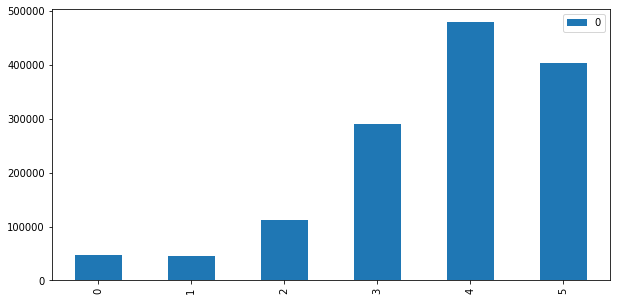

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

rating.sort()
freq_counts = Counter(rating)
df2 = pd.DataFrame.from_dict(freq_counts, orient = 'index')

df2.plot(kind = 'bar', figsize = (10, 5))

In [27]:
import numpy as np
bins = [0, 3, np.inf]
names = ['negative', 'positive']
df['Range'] = pd.cut(df['rating'], bins, labels=names)

In [28]:
df.head(10)

,book_id,has_spoiler,rating,review_id,review_sentences,timestamp,user_id,Range
0,12620969,False,2,5c644ed80578f1cf6d02721f1d306c89,Quarantine: The Loners is the first in a serie...,2016-01-10,ed5a935d14414e6ac3a2227f0ea46271,negative
1,20342545,False,3,e5c39c40e91edef4c3002e8299d1e32f,"I have an qualm with this book, and it is that...",2017-02-25,b71fc94bc563905d44de309653f981cd,negative
2,11879737,False,1,ec930c48103e474d3c8e0ca3be238494,What a waste of time.,2013-04-13,e06e26f10f73a5e21e4cb3eb8695f139,negative
3,37470,False,4,a17dbe0e80fbe055cf81de64c4bd22aa,Really interesting look at life in the royal c...,2012-12-13,8f9b8e57816bbc2da144253f99742f87,positive
4,27257359,False,1,6a0f2c88297f0b4fc1a58d23a8921ecd,DNF.,2017-02-23,b23f58a5f24e1d8c13abd990b086ef75,negative
5,2536134,False,5,24c50a4d58d1ce1da9d0de214eda58c4,If you're looking for a book that will creep y...,2015-11-10,de65f2d844d1ee1ea3ba8dcd15207c53,positive
6,6262231,False,4,697396be34b5ba7ac90de90ed49c3a1b,"I've been reading a lot of classics lately, wh...",2013-04-07,8e4573b94871e75398528196a9f39dff,positive
7,17416065,False,4,a8755e6e65963fe3d82d9e641b0dec4a,4.5 Stars!,2015-03-25,acb606157c7a922ac014c9569526c232,positive
8,28920,False,3,ff1762890d2125779c913675af5e6dfa,"Haunting and lovely as always, though I must s...",2013-10-03,eae16d0c1f4777d13939a8e5e4abdb38,negative
9,6164628,False,2,8b5afe2cb951e96855906d0cfb634b01,Interesting.,2010-06-16,3e788b8bd7e5dccc4c21e09d0cac31a5,negative


In [32]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

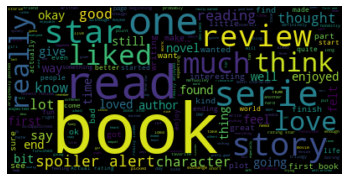

In [35]:
#word cloud on review sentences
sentences = ' '.join(df[df['Range']=='negative']['review_sentences'].to_list())
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(sentences)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
wordcloud.to_file("first_review.png")

In [45]:
df.isna().any()

book_id             False
has_spoiler         False
rating              False
review_id           False
review_sentences    False
timestamp           False
user_id             False
Range                True
dtype: bool

In [46]:
df.dropna(subset=['book_id', 'has_spoiler','rating','review_id',
            'review_sentences','timestamp','user_id','Range'], axis=0, inplace=True)

In [47]:
print("Now shape of our dataset is ",df.shape)

Now shape of our dataset is  (1330981, 8)


In [48]:
#data preparation for fasttext
with open('goodreads_reviews.txt', 'w') as f:
    for each_text, each_label in zip(df['review_sentences'], df['Range']):
        f.writelines(f'__label__{each_label} {each_text}\n')

In [49]:
#data preparation for fasttext
with open('goodreads_books.txt', 'w') as f:
    for each_text, each_label in zip(df['review_sentences'], df['rating']):
        f.writelines(f'__label__{each_label} {each_text}\n')

In [50]:
bins = [0,1,2,3,4,5]
names = ['terrible', 'poor', 'average', 'good', 'excellent']
df['Multi'] = pd.cut(df['rating'], bins, labels=names)

In [51]:
df.head(10)

,book_id,has_spoiler,rating,review_id,review_sentences,timestamp,user_id,Range,Multi
0,12620969,False,2,5c644ed80578f1cf6d02721f1d306c89,Quarantine: The Loners is the first in a serie...,2016-01-10,ed5a935d14414e6ac3a2227f0ea46271,negative,poor
1,20342545,False,3,e5c39c40e91edef4c3002e8299d1e32f,"I have an qualm with this book, and it is that...",2017-02-25,b71fc94bc563905d44de309653f981cd,negative,average
2,11879737,False,1,ec930c48103e474d3c8e0ca3be238494,What a waste of time.,2013-04-13,e06e26f10f73a5e21e4cb3eb8695f139,negative,terrible
3,37470,False,4,a17dbe0e80fbe055cf81de64c4bd22aa,Really interesting look at life in the royal c...,2012-12-13,8f9b8e57816bbc2da144253f99742f87,positive,good
4,27257359,False,1,6a0f2c88297f0b4fc1a58d23a8921ecd,DNF.,2017-02-23,b23f58a5f24e1d8c13abd990b086ef75,negative,terrible
5,2536134,False,5,24c50a4d58d1ce1da9d0de214eda58c4,If you're looking for a book that will creep y...,2015-11-10,de65f2d844d1ee1ea3ba8dcd15207c53,positive,excellent
6,6262231,False,4,697396be34b5ba7ac90de90ed49c3a1b,"I've been reading a lot of classics lately, wh...",2013-04-07,8e4573b94871e75398528196a9f39dff,positive,good
7,17416065,False,4,a8755e6e65963fe3d82d9e641b0dec4a,4.5 Stars!,2015-03-25,acb606157c7a922ac014c9569526c232,positive,good
8,28920,False,3,ff1762890d2125779c913675af5e6dfa,"Haunting and lovely as always, though I must s...",2013-10-03,eae16d0c1f4777d13939a8e5e4abdb38,negative,average
9,6164628,False,2,8b5afe2cb951e96855906d0cfb634b01,Interesting.,2010-06-16,3e788b8bd7e5dccc4c21e09d0cac31a5,negative,poor


In [52]:
#data preparation for fasttext
with open('books_reviews.txt', 'w') as f:
    for each_text, each_label in zip(df['review_sentences'], df['Multi']):
        f.writelines(f'__label__{each_label} {each_text}\n')